In [3]:
import pandas as pd
import numpy as np

df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [9]:
ndf = df[['TV', 'Radio', 'Newspaper', 'Sales']]
ndf

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
ndf.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
ndf.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [15]:
ndf.shape

(200, 4)

In [16]:
ndf.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [20]:
print("TV correlation with Sales : ",df['TV'].corr(df['Sales']))
print("Radio correlation with Sales : ",df['Radio'].corr(df['Sales']))
print("Newspaper correlation with Sales : ",df['Newspaper'].corr(df['Sales']))

TV correlation with Sales :  0.7822244248616061
Radio correlation with Sales :  0.5762225745710551
Newspaper correlation with Sales :  0.22829902637616528


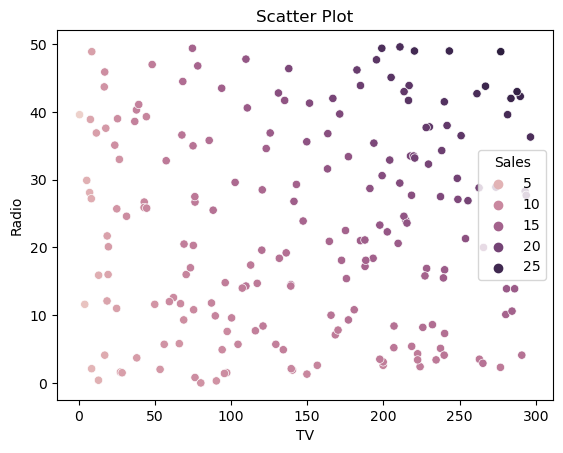

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='TV',y='Radio',data=ndf,hue="Sales")
plt.title("Scatter Plot")
plt.show()


In [33]:
import plotly.express as exp 
fig=exp.histogram(
    ndf,
    x='TV',
    nbins=30,
    marginal='box',
    title='Histogram'
)
fig.update_layout(bargap=0.1)
fig.show()

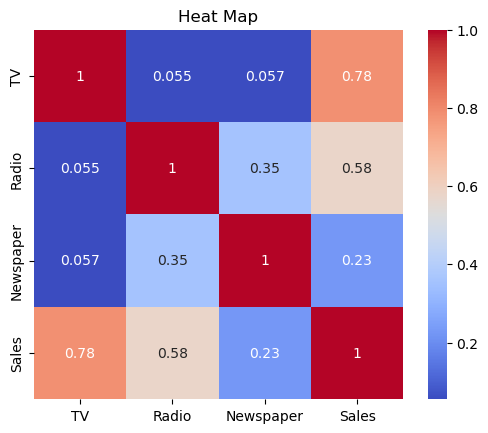

In [34]:
correlation_mat=ndf.corr()
sns.heatmap(correlation_mat,annot=True,square=True,cmap='coolwarm')
plt.title('Heat Map')
plt.show()

Coefficient  [0.04581434]
Intercept  7.31081016541168
Mean Squared Error : 7.497479593464674
Mean Squared Error: 7.497479593464674
Root Mean Squared Error: 2.7381525876883988
Mean Absolute Error: 2.057546579430008


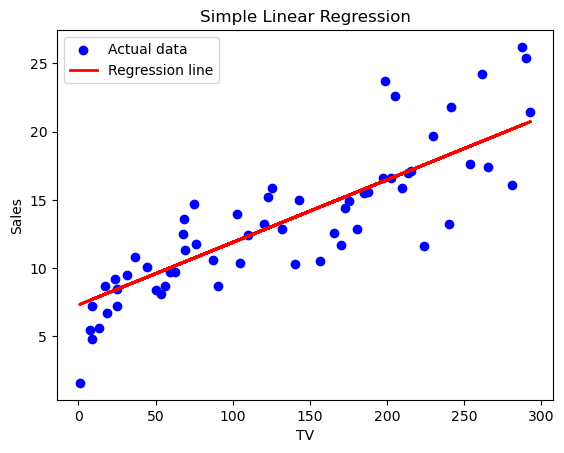

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import r2_score,mean_squared_error
X=df[['TV']]
Y=df['Sales']


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

model=LinearRegression()
model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

print("Coefficient ",model.coef_)
print("Intercept ",model.intercept_)
print(f'Mean Squared Error : {metrics.mean_squared_error(Y_test,Y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(Y_test, Y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(Y_test, Y_pred)}')

plt.scatter(X_test, Y_test, color='blue', label='Actual data')

# Plot the regression line (using test data)
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression line')

# Add titles and labels
plt.title('Simple Linear Regression')
plt.xlabel('TV')  # Replace with feature name(s)
plt.ylabel('Sales')  # Replace with target variable name

# Display the legend
plt.legend()

# Show the plot
plt.show()